# BDF2 Stability

In [1]:
using Pkg
Pkg.activate(".")
using SymPy
using Plots
gr();
using LaTeXStrings

Define the sequence

In [2]:
x0 = symbols("x_0")
z, σ = symbols("z, sigma")
n = symbols("n", integer=true, positive=true)
θ = symbols("theta", real=true)
zx,zy = symbols("z_x, z_y", real=true)
;

In [3]:
X(n) = σ^n
F(n) = z*X(n)

F (generic function with 1 method)

In [4]:
meth0 = X(n+1) - 4//3 * X(n) + 1//3*X(n-1) - 2//3*F(n+1)
# meth0 = X(n+1) - 360//147 * X(n) + 450//147*X(n-1) - 400//147*X(n-2) + 225//147*X(n-3) - 72//147*X(n-4) + 10//147*X(n-4) - 60//147*F(n+1)

         n        n - 1          n + 1               
  4*sigma    sigma        2*sigma     *z        n + 1
- -------- + ---------- - -------------- + sigma     
     3           3              3                    

In [5]:
eq1 = meth0/σ^(n-1) |> simplify

         2                         
  2*sigma *z        2   4*sigma   1
- ---------- + sigma  - ------- + -
      3                    3      3

In [6]:
eq2 = eq1 |> subs( z=> zx + 1im*zy, σ => cos(θ) + 1im*sin(θ) )

                                             2                                
  2*(z_x + I*z_y)*(I*sin(theta) + cos(theta))                               2 
- -------------------------------------------- + (I*sin(theta) + cos(theta))  
                       3                                                      

                                   
  4*I*sin(theta)   4*cos(theta)   1
- -------------- - ------------ + -
        3               3         3

In [7]:
eq3 = [ real(eq2), imag(eq2) ]

2-element Array{Sym,1}:
 z_x*(2*sin(theta)^2/3 - 2*cos(theta)^2/3) + 4*z_y*sin(theta)*cos(theta)/3 - sin(theta)^2 + cos(theta)^2 - 4*cos(theta)/3 + 1/3
          -4*z_x*sin(theta)*cos(theta)/3 + z_y*(2*sin(theta)^2/3 - 2*cos(theta)^2/3) + 2*sin(theta)*cos(theta) - 4*sin(theta)/3

In [8]:
sol = solve(eq3, [zx, zy] )

Dict{Any,Any} with 2 entries:
  z_y => (-cos(theta) + 2)*sin(theta)
  z_x => cos(theta)^2 - 2*cos(theta) + 1

In [9]:
Zx(t) = lambdify(sol[zx])(t)
Zy(t) = lambdify(sol[zy])(t)
;

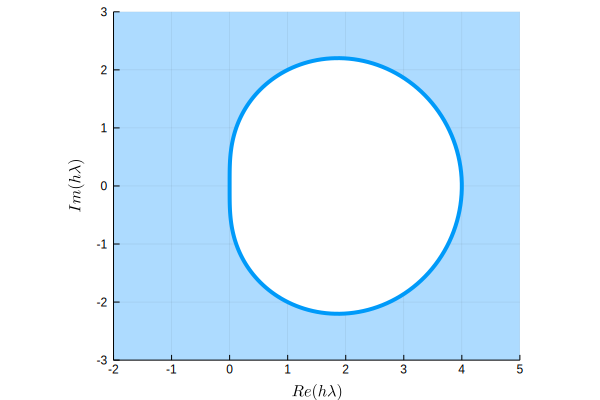

In [10]:
plot( Zx, Zy, 0, 2π, line=4, legend=false, fill=(0,:white), aspect_ratio=1, xlim=(-2,5), ylim=(-3,3))
plot!(background_color_inside=RGBA(153/255, 210/255, 255/255,0.8) )
plot!(xlabel=L"Re(h \lambda)", ylabel=L"Im(h \lambda)")